In [ ]:
import pandas as pd

In [ ]:
# Read the CSV file into a pandas DataFrame
path = ('/content/drive/MyDrive/Dataset/HR analytics.xlsx - Sheet1.csv')
df=pd.read_csv(path)
df.head(1015)



,Name,Gender,Department,Salary,Loc,Rating
0,Ches Bonnell,Male,Sales,"$88,050",Bellevue,Very Good
1,Garwin Peasegood,Female,Engineering,"$68,220",Bellevue,Good
2,Sidoney Yitzhok,Female,NaN,"$118,440",Wellington,Not Rated
3,Saunders Blumson,Male,Legal,"$56,370",Los Angeles,Very Good
4,Gardy Grigorey,Female,Support,"$107,090",Los Angeles,Poor
...,...,...,...,...,...,...
1010,Shaylyn Ransbury,Female,Support,"$100,370",Wellington,Average
1011,Christoph Stretton,Female,Business Development,"$90,240",Wellington,Poor
1012,Jordain Cyster,Female,Engineering,"$75,870",Los Angeles,Average
1013,Malory Biles,Female,Training,"$58,740",Los Angeles,Not Rated


In [ ]:
# 1 How many Males/Females are there in the entire organization?

df['Gender'].value_counts()


Gender
Male      544
Female    471
Name: count, dtype: int64

In [ ]:
# 2 How many Males/Females are there in the each department or for each location?

df.groupby(['Department', 'Gender']).size().unstack()
df.groupby(['Loc', 'Gender']).size().unstack()


Gender,Female,Male
Loc,,
Bellevue,127,143
Los Angeles,176,209
Wellington,168,192


In [ ]:
# Convert 'Salary' column to string and then remove non-numeric characters and convert to numeric
df['Salary'] = df['Salary'].astype(str).str.replace('[^\d.]', '', regex=True).astype(float)

# 3 find the department with the highest average pay
highest_avg_pay_department = df.groupby('Department')['Salary'].mean().sort_values(ascending=False).head(1)
print(highest_avg_pay_department)


Department
Business Development    74335.952381
Name: Salary, dtype: float64


In [ ]:
# 4 For which location is the average Pay highest

df.groupby('Loc')['Salary'].mean().sort_values(ascending=False).head(1)


Loc
Bellevue    72201.962963
Name: Salary, dtype: float64

In [ ]:
# 5 What percentage of employees received good & very good rating? What about poor & very poor rating? and average rating?
good_very_good = len(df[df['Rating'].isin(['Good', 'Very Good'])]) / len(df) * 100
poor_very_poor = len(df[df['Rating'].isin(['Poor ', 'Very Poor'])]) / len(df) * 100
average = len(df[df['Rating'] == 'Average']) / len(df) * 100

print(f'Percentage of employees with good or very good rating: {good_very_good:.2f}%')
print(f'Percentage of employees with poor or very poor rating: {poor_very_poor:.2f}%')
print(f'Percentage of employees with average rating: {average:.2f}%')


Percentage of employees with good or very good rating: 27.98%
Percentage of employees with poor or very poor rating: 5.62%
Percentage of employees with average rating: 45.42%


In [ ]:
# Group by Department and Gender, then calculate the mean salary
mean_salary = df.groupby(['Department', 'Gender'])['Salary'].mean().unstack()

# 6 Calculate the gender pay gap for each department
mean_salary['Pay Gap (%)'] = (mean_salary['Male'] - mean_salary['Female']) / mean_salary['Male'] * 100

# Display the result
print(mean_salary)


Gender                          Female          Male  Pay Gap (%)
Department                                                       
Accounting                68076.333333  73184.047619     6.979273
Business Development      72850.952381  75820.952381     3.917123
Engineering               75422.105263  66026.136364   -14.230681
Human Resources           62039.318182  73502.380952    15.595499
Legal                     64700.833333  70728.035714     8.521660
Marketing                 74313.333333  70500.833333    -5.407737
Product Management        69088.095238  72264.400000     4.395394
Research and Development  64896.153846  64974.615385     0.120757
Sales                     66701.052632  71957.555556     7.305005
Services                  73075.476190  74787.619048     2.289340
Support                   68136.486486  75666.170213     9.951189
Training                  73025.263158  71624.651163    -1.955489


In [ ]:
# Group by Location and Gender, then calculate the mean salary
mean_salary = df.groupby(['Loc', 'Gender'])['Salary'].mean().unstack()

# 7 Calculate the gender pay gap for each location
mean_salary['Pay Gap (%)'] = (mean_salary['Male'] - mean_salary['Female']) / mean_salary['Male'] * 100

# Display the result
print(mean_salary)


Gender             Female         Male  Pay Gap (%)
Loc                                                
Bellevue     69580.236220  74530.34965     6.641742
Los Angeles  70056.079545  71887.84689     2.548090
Wellington   68034.285714  70199.06250     3.083769


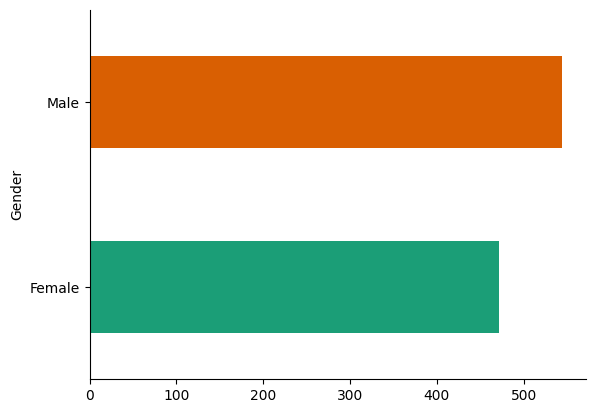

In [ ]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

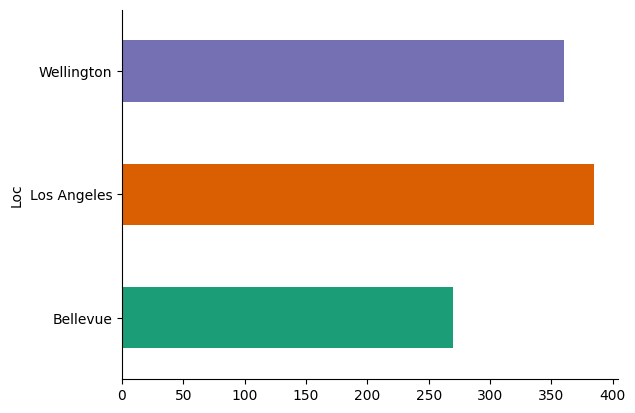

In [ ]:
# @title Loc

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Loc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Department'>

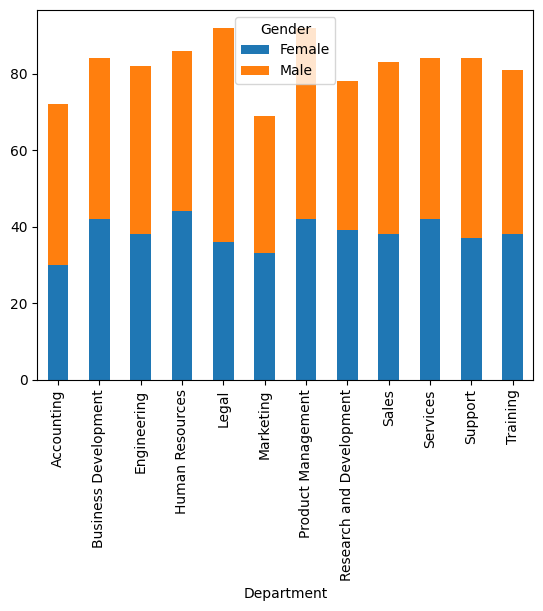

In [ ]:
# @title Gender Distribution by Department

df.groupby(['Department', 'Gender']).size().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Department'>

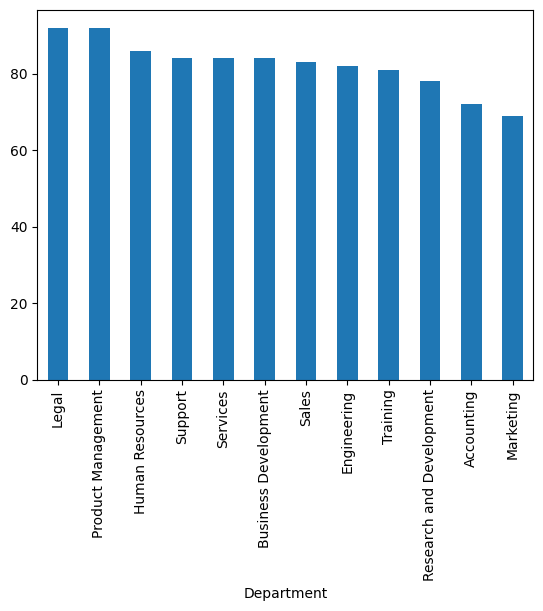

In [ ]:
# @title Department Employee Count

df['Department'].value_counts().plot.bar()

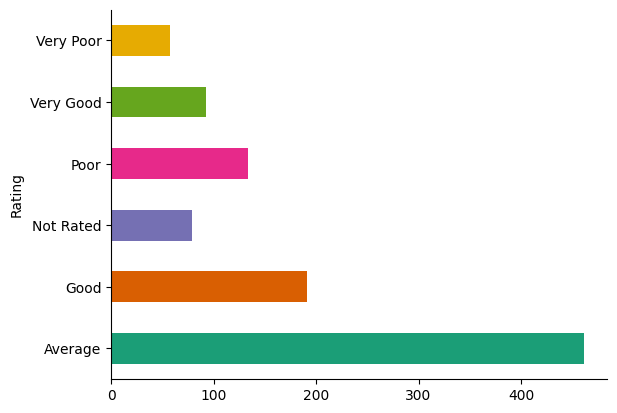

In [ ]:
# @title Rating

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

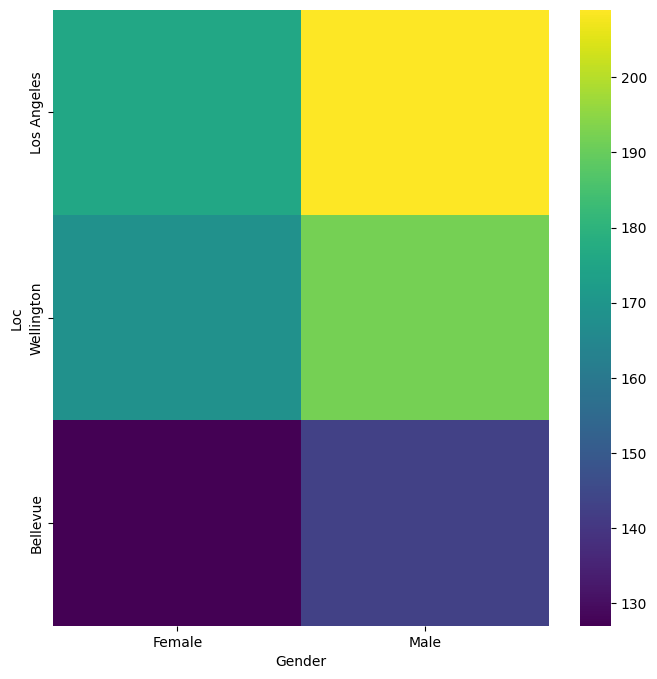

In [ ]:
# @title Gender vs Loc

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Loc'].value_counts()
    for x_label, grp in df.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Loc')

<Axes: title={'center': 'Salary'}, xlabel='Loc'>

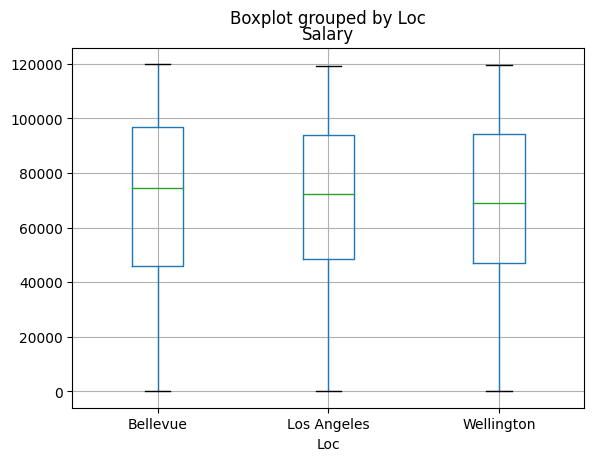

In [ ]:
# @title Salary Distribution by Location

df.boxplot(column='Salary', by='Loc')

<Axes: xlabel='Gender'>

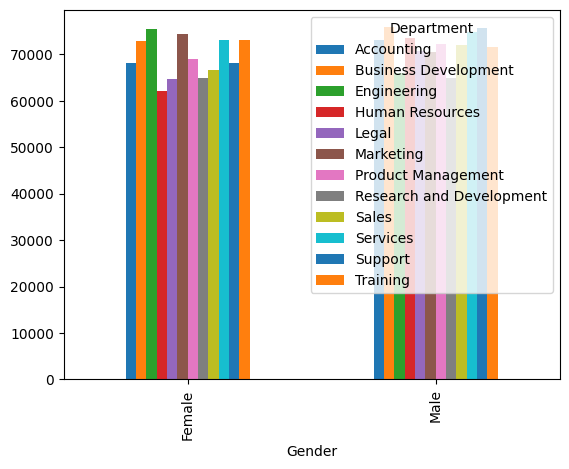

In [ ]:
# @title Average Salary by Gender and Department

df.groupby(['Gender', 'Department'])['Salary'].mean().unstack().plot(kind='bar')